# <span style="color:#0d98ba">AMERICAN IDOL</span>
<span style="color:aquamarine">**2024 Tidytuesday  Week 30** </span>

# Setup

## Libraries

In [1]:
from datetime import datetime
# or import datetime as dt and then use dt.datetime.method

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pwd()

'/Users/birusod/Documents/DataScienceDocs/GitProjects/Projects2024/PyDocs/W30_AmericanIdol'

## Data

In [3]:
season_year = pd.read_csv('season_year.csv')

In [4]:
data_url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-23/finalists.csv"
dfr = pd.read_csv(data_url,
                  encoding='unicode_escape'  # 'utf-8' codec can't decode byte 0x8e in position 11535
                  ) 
dfr.shape

(190, 6)

## Fonts

**Terminal:**

`fc-list | grep "Fira"`

This will return all the fonts that contain the word Fira in their name.

**Notebook:**

In [5]:
from matplotlib import rcParams
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import findfont

# check in font is locally downloaded
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Pacif'.lower() in fontpath.lower():
        print(fontpath)

/Library/Fonts/Pacifico-Regular.ttf


In [6]:
#  list  fonts:
font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_files[:5]

['/Library/Fonts/JuliaMono-Medium.ttf',
 '/Library/Fonts/Arial Unicode.ttf',
 '/Library/Fonts/Iosevka-Regular.ttc',
 '/Library/Fonts/LINESeedSans_He.ttf',
 '/Library/Fonts/FantasqueSansMono-Regular.otf']

In [7]:
# search font by name:
for ff in font_files:
        if 'Fira' in ff:
                print(ff)

/Library/Fonts/FiraCode-Retina.ttf
/Library/Fonts/FiraCode-Bold.ttf
/Library/Fonts/FiraCode-Medium.ttf
/Library/Fonts/FiraCode-Regular.ttf
/Library/Fonts/FiraCode-Light.ttf
/Library/Fonts/FiraCode-SemiBold.ttf


In [9]:
# load all fonts:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [10]:
findfont('Roboto', fontext='ttf')

'/Library/Fonts/Roboto-Regular.ttf'

In [12]:
# select font:
rcParams['font.family'] = 'Great Vibes'

In [13]:
# naming font style:
pally_medium = FontProperties(fname='/Library/Fonts/Pally-Medium.otf')
fira_light = FontProperties(fname='/Library/Fonts/FiraCode-Light.ttf')

# EDA

## Overview

In [14]:
dfr.columns = ['contestant', 'birthday', 'birthplace', 'hometown', 'description','season']

In [27]:
dfr.columns

Index(['contestant', 'birthday', 'birthplace', 'hometown', 'description',
       'season'],
      dtype='object')

In [28]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   contestant   190 non-null    object
 1   birthday     189 non-null    object
 2   birthplace   184 non-null    object
 3   hometown     102 non-null    object
 4   description  178 non-null    object
 5   season       190 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 9.0+ KB


In [10]:
dfr.describe()

,Season
count,190.000000
mean,8.863158
std,4.860184
min,1.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,17.000000


In [29]:
dfr.head()

,contestant,birthday,birthplace,hometown,description,season
0,Kelly Clarkson,24-Apr-82,"Fort Worth, Texas","Burleson, Texas","She performed Aretha Franklin's version of ""Re...",1
1,Justin Guarini,28-Oct-78,"Columbus, Georgia","Doylestown, Pennsylvania","He performed Oleta Adams' version of ""Get Her...",1
2,Nikki McKibbin,28-Sep-78,"Grand Prairie, Texas",NaN,She had previously been on Popstars and auditi...,1
3,Tamyra Gray,26-Jul-79,"Takoma Park, Maryland","Atlanta, Georgia",She had appeared on TV commercials and worked ...,1
4,R. J. Helton,17-May-81,"Pasadena, Texas","Cumming, Georgia","J. Helton (born May 17, 1981, in Pasadena, Tex...",1


In [30]:
dfr.tail()

,contestant,birthday,birthplace,hometown,description,season
185,Jeremiah Lloyd Harmon,9-Oct-92,"Catonsville, Maryland","Catonsville, Maryland",Jeremiah's earliest childhood memory of music ...,17
186,Walker Burroughs,29-Sep-98,"Birmingham, Alabama",NaN,Walker had participated in church choir since ...,17
187,Alyssa Raghu,2-Mar-02,"Orlando, Florida","Orlando, Florida","Growing up with two different cultures, hearin...",17
188,Dimitrius Graham,8-Jun-91,"Baltimore, Maryland","Baltimore, Maryland",Dimitrius's earliest memory of music is his mo...,17
189,Uch,15-Jul-94,"Sugarland, Texas","Sugarland, Texas","As a child, Uch visited family in Nigeria and...",17


## Subsetting data and adding new column

### Merging dfs

In [15]:
df = pd.merge(dfr, season_year, how="inner", on="season")
df.head(2)

,contestant,birthday,birthplace,hometown,description,season,end_year
0,Kelly Clarkson,24-Apr-82,"Fort Worth, Texas","Burleson, Texas","She performed Aretha Franklin's version of ""Re...",1,2002
1,Justin Guarini,28-Oct-78,"Columbus, Georgia","Doylestown, Pennsylvania","He performed Oleta Adams' version of ""Get Her...",1,2002


### Date column
 - Change birthdate to date 
 - Create a year column
 - Calculate contestant age during the season

In [16]:
df['birthday'] = pd.to_datetime(df['birthday'], format='%d-%b-%y')
df['year'] = df['birthday'].dt.year
df['age'] = df['end_year'] - df['year']
df.head(4)

,contestant,birthday,birthplace,hometown,description,season,end_year,year,age
0,Kelly Clarkson,1982-04-24,"Fort Worth, Texas","Burleson, Texas","She performed Aretha Franklin's version of ""Re...",1,2002,1982.0,20.0
1,Justin Guarini,1978-10-28,"Columbus, Georgia","Doylestown, Pennsylvania","He performed Oleta Adams' version of ""Get Her...",1,2002,1978.0,24.0
2,Nikki McKibbin,1978-09-28,"Grand Prairie, Texas",NaN,She had previously been on Popstars and auditi...,1,2002,1978.0,24.0
3,Tamyra Gray,1979-07-26,"Takoma Park, Maryland","Atlanta, Georgia",She had appeared on TV commercials and worked ...,1,2002,1979.0,23.0


### State column
 - Split birth place into city and state
 - Fill in missing states (for known already)
 - Remove non US birtplaces (other countries / state)

In [17]:
df[['city', 'state']] = df['birthplace'].str.split(', ', expand=True)  # , expand=True
df.head(2)

,contestant,birthday,birthplace,hometown,description,season,end_year,year,age,city,state
0,Kelly Clarkson,1982-04-24,"Fort Worth, Texas","Burleson, Texas","She performed Aretha Franklin's version of ""Re...",1,2002,1982.0,20.0,Fort Worth,Texas
1,Justin Guarini,1978-10-28,"Columbus, Georgia","Doylestown, Pennsylvania","He performed Oleta Adams' version of ""Get Her...",1,2002,1978.0,24.0,Columbus,Georgia


In [18]:
df['state'] = np.where(
    df['contestant'] == 'Amber Holcomb', 'Texas', np.where(
        df['contestant'] == 'Burnell Taylor', 'Louisiana', np.where(
            df['contestant'] == 'Curtis Finch, Jr.', 'Missouri', np.where(
                df['contestant'] == 'Devin Velez', 'Illinois', np.where(
                    df['contestant'] == 'Jennifer Hudson', 'Illinois', np.where(
                        df['contestant'] == 'Stevie Scott', 'California', np.where(
                            df['contestant'] == 'Jos "Sway" Penala', 'California', df['state']
                        )
                    )
                )
            )
        )
    )
)

In [17]:
df[df['contestant'] == 'Jos "Sway" Penala']

,contestant,birthday,birthplace,hometown,description,season,end_year,year,age,city,state
54,"Jos ""Sway"" Penala",1978-01-23,NaN,NaN,He was the only Asian-American who made it to ...,5,2005,1978.0,27.0,NaN,California


In [19]:
df2 = df[~df.loc[:, 'state'].isin(['Alberta', 'Germany', 'Philippines', 'Ireland', 'Ukraine'])]
df2.loc[:, 'season'] = 'Season_' + df2.loc[:, 'season'].astype(str)
df2.head(2)


,contestant,birthday,birthplace,hometown,description,season,end_year,year,age,city,state
0,Kelly Clarkson,1982-04-24,"Fort Worth, Texas","Burleson, Texas","She performed Aretha Franklin's version of ""Re...",Season_1,2002,1982.0,20.0,Fort Worth,Texas
1,Justin Guarini,1978-10-28,"Columbus, Georgia","Doylestown, Pennsylvania","He performed Oleta Adams' version of ""Get Her...",Season_1,2002,1978.0,24.0,Columbus,Georgia


# Viz

## Particiaption by state (USA)

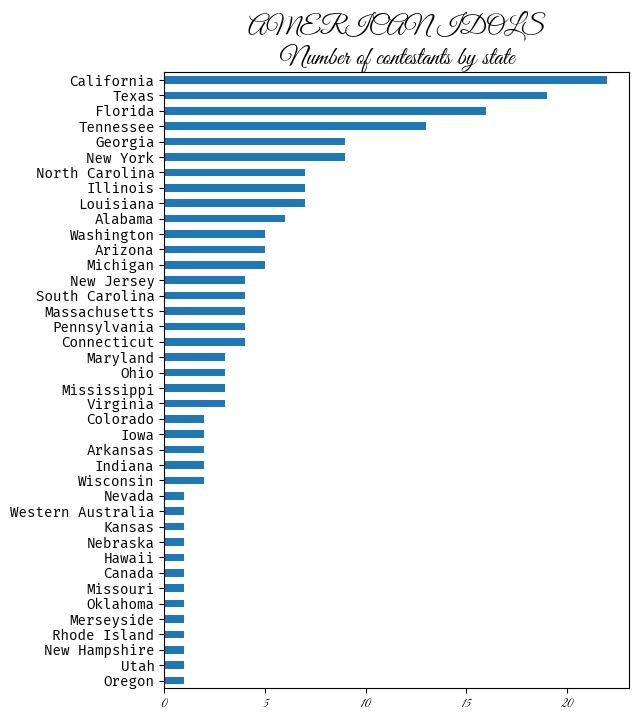

In [50]:
ax = df2['state'].value_counts().sort_values().plot.barh(
    figsize=(6,8), 
    ylabel="")

ax.set_title(
    'AMERICAN IDOLS\nNumber of contestants by state',
    fontname='Great Vibes', fontsize=18)

for label in ax.get_yticklabels():
    label.set_fontname('Fira Code')
    label.set_fontsize(10)
plt.show()

In [ ]:


#Or if you plot in plt and want to change the fontname specifically, you can use

#plt.xticks(fontname = 'Helvetica')

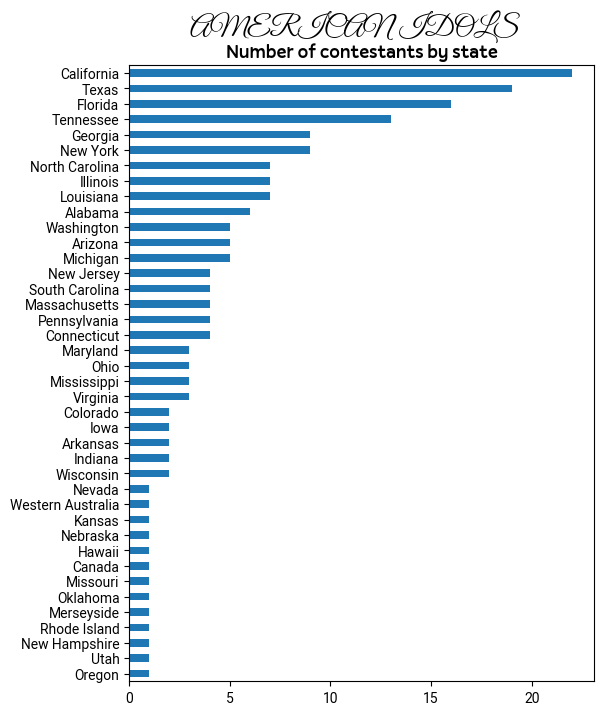

In [21]:
by_state_df = df2['state'].value_counts().sort_values()

fig = plt.figure(figsize=(6, 8))
subtitle_string = 'Number of contestants by state'

by_state_df.plot(kind='barh')
fig.suptitle('AMERICAN IDOLS', y = .95, size = 20)
plt.title(subtitle_string, font = pally_medium, size = 14)
plt.ylabel("")

ax = fig.gca()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Roboto')
    label.set_fontsize(10)
    
plt.show()

## Average age by season and by state

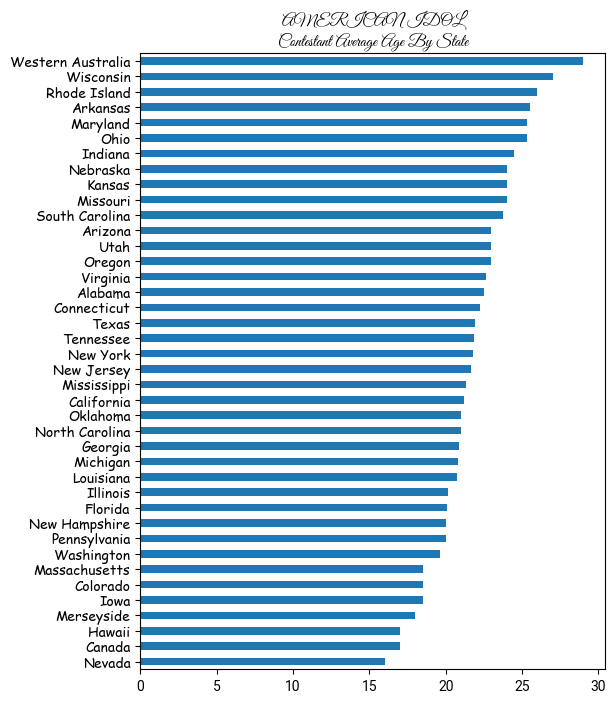

In [35]:
ax = df2.groupby('state')['age'].mean().sort_values().plot.barh(
    figsize = (6, 8),
    title = 'AMERICAN IDOL\nContestant Average Age By State',
    ylabel = ""
    )
# Set the font name for axis tick labels to be Comic Sans
for tick in ax.get_xticklabels():
    tick.set_fontname("Roboto")
for tick in ax.get_yticklabels():
    tick.set_fontname("Comic Sans MS")

plt.show()

In [36]:
by_season = df2.groupby('season')['age'].mean().reset_index()
by_season['season'].to_list()
by_season['season2'] = pd.Categorical(
    by_season['season'],
    categories= ['Season_1', 'Season_2', 'Season_3', 'Season_4', 'Season_5', 'Season_6', 'Season_7', 'Season_8',
                 'Season_9', 'Season_10', 'Season_11', 'Season_12', 'Season_13', 'Season_14', 'Season_15',
                 'Season_16', 'Season_17'],
    ordered=True)
by_season;

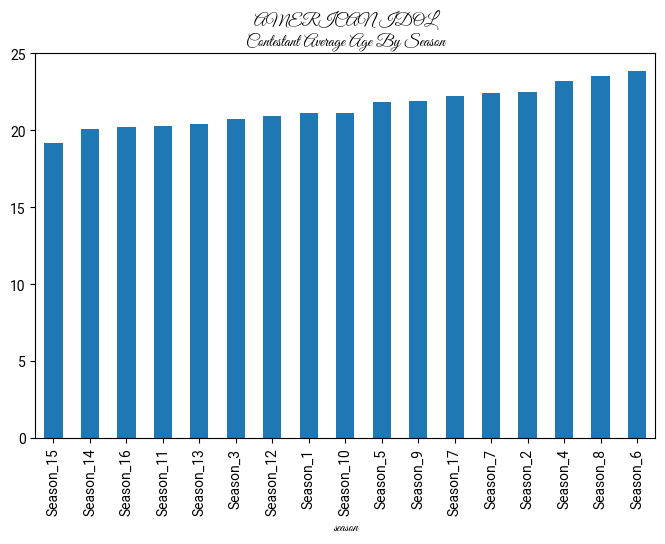

In [39]:
ax = df2.groupby('season')['age'].mean().sort_values().plot.bar(
    figsize = (8, 5),
    title = 'AMERICAN IDOL\nContestant Average Age By Season',
    ylabel = ""
    )

# Set the font name for axis tick labels to be Comic Sans
for tick in ax.get_xticklabels():
    tick.set_fontname("Roboto")
for tick in ax.get_yticklabels():
    tick.set_fontname("Roboto")


plt.show()

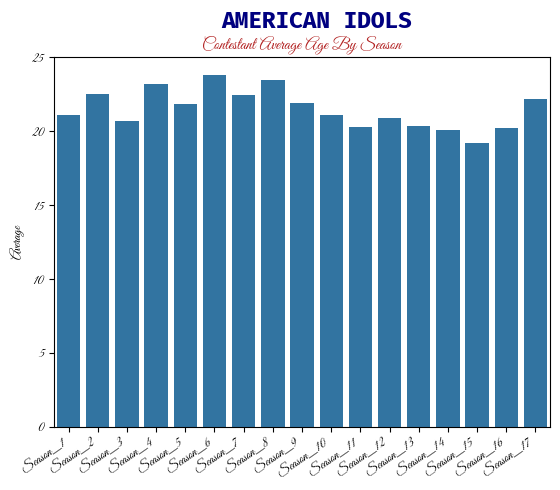

In [43]:
fig = plt.Figure(figsize = (10, 5))

p = sns.barplot(x ='season2', y = 'age', data = by_season)

plt.title('Contestant Average Age By Season', color = 'firebrick')
plt.ylabel("Average")
plt.xlabel("")
plt.xticks(rotation=35, ha = 'right')

ln = len(by_season['season2'])/2

plt.text(x=ln, y=27, s='AMERICAN IDOLS', 
         fontsize=16, 
         weight='bold', 
         ha = 'center',
         color = 'navy',
         family = 'Fira Code'
         )


plt.show()

8.5

In [15]:
season_year.head(2)

,season,end_year
0,1,2002
1,2,2002


In [32]:
dfr['season'].value_counts().sort_index()
season_year['season'].value_counts().sort_index()

season
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
Name: count, dtype: int64